In [1]:
! wget https://raw.githubusercontent.com/PAE-ITBA-ML-2019/Regularizacion/master/reg_helper.py
! wget https://raw.githubusercontent.com/PAE-ITBA-ML-2019/Regularizacion/master/fnn_helper.py
! wget https://raw.githubusercontent.com/PAE-ITBA-ML-2019/Regularizacion/master/draw_nn.py
! wget https://raw.githubusercontent.com/PAE-ITBA-ML-2019/Regularizacion/master/regularization_helper.py
 
! wget https://github.com/PAE-ITBA-ML-2019/Regularizacion/raw/master/data.zip
! unzip data.zip


--2019-10-28 15:25:59--  https://raw.githubusercontent.com/PAE-ITBA-ML-2019/Regularizacion/master/reg_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13294 (13K) [text/plain]
Saving to: ‘reg_helper.py’

reg_helper.py       100%[===================>]  12.98K  --.-KB/s    in 0.01s   

2019-10-28 15:25:59 (1.33 MB/s) - ‘reg_helper.py’ saved [13294/13294]

--2019-10-28 15:26:00--  https://raw.githubusercontent.com/PAE-ITBA-ML-2019/Regularizacion/master/fnn_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2402 (2.3K) [text/pla

### 6. Batch Normalization 
Paper: https://arxiv.org/pdf/1502.03167.pdf  
Soluciona el problema de la "Covariate Shift" acelerando el entrenamiento y nos da de regalo regularización  

Paper efecto regularizador: 

https://arxiv.org/abs/1809.00846

Paper de le interferencia entre dropout y batchnormalization:  
https://arxiv.org/abs/1801.05134

![images/batch_norm.webp](https://github.com/edugarg/Regularizacion/blob/master/images/batch_norm.webp?raw=1)

$\beta$ reemplaza al bias, por lo que puede usarse en la capa densa:
use_bias=False

En el momento de testing, se usa una promediación sobre todos los batches de los $\mu_B$ y $\sigma^2_B$ (Exponential Weighted Average)

Using TensorFlow backend.


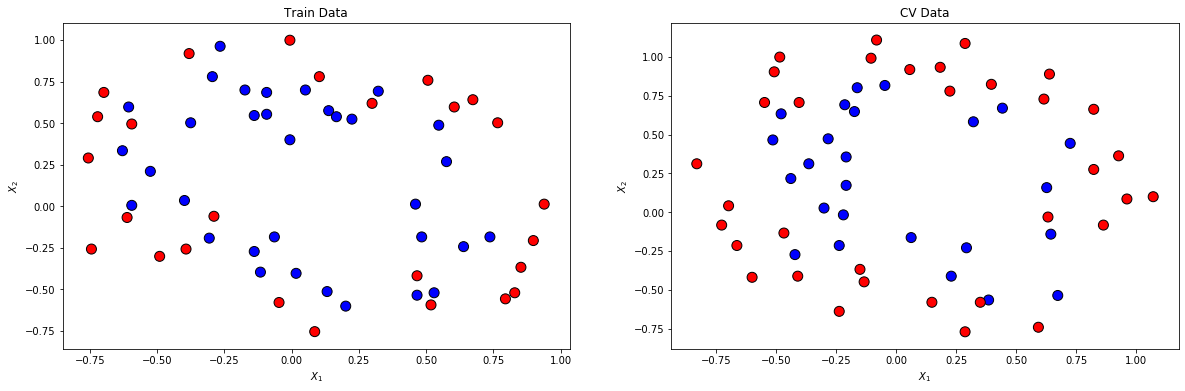

In [2]:
import numpy as np
import reg_helper as RHelper
import draw_nn
from matplotlib import pyplot as plt 
folder = 'data/'
X_train = np.load(folder+'X_train.npy')
X_test = np.load(folder+'X_test.npy')
y_train = np.load(folder+'y_train.npy') 
y_test = np.load(folder+'y_test.npy')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, ax=ax2)
ax1.set_title('Train Data')
ax2.set_title('CV Data')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax2.set_xlabel('$X_1$')
ax2.set_ylabel('$X_2$')
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation
from keras import optimizers
from fnn_helper import PlotLosses

In [0]:
hidden_units = 20
input_shape = 2
output_size = 1

Batch Normalization: 
Por cada entrada tengo 4 parámetros, dos son entrenables y dos son no entrenables

En la primera capa tengo 20 entradas por 4 parámetros = 80
En la segunda teng 1 entrada por 4 parámetros = 4

De esos 84 la la mitad son entrenables por eso hay 42 parámetros no entrenables


In [8]:
# Con BatchNormalization
model_bn = Sequential()
model_bn.add(Dense(hidden_units,input_dim=input_shape, use_bias=False))
model_bn.add(BatchNormalization())
model_bn.add(Activation('sigmoid'))
model_bn.add(Dense(output_size, use_bias=False))
model_bn.add(BatchNormalization())
model_bn.add(Activation('sigmoid'))
model_bn.summary()

lr = 0.001 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                40        
_________________________________________________________________
batch_normalization_3 (Batch (None, 20)                80        
_________________________________________________________________
activation_3 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 20        
_________________________________________________________________
batch_normalization_4 (Batch (None, 1)                 4         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 144
Trainable params: 102
Non-trainable params: 42
_______________________________________________________

In [0]:
# sin BatchNormalization
model_bn = Sequential()
model_bn.add(Dense(hidden_units,input_dim=input_shape))
model_bn.add(Activation('sigmoid'))
model_bn.add(Dense(output_size))
model_bn.add(Activation('sigmoid'))
model_bn.summary()

lr = 0.1 

In [0]:
# decay = 0.001 
batch_size = 59 
epochs = 4000
selectedOptimizer = optimizers.adam(lr=lr, decay=decay)
model_bn.compile(loss = 'binary_crossentropy', optimizer=selectedOptimizer, metrics=['accuracy'])

- Cuales son los non-trainable parameters?
- Donde va la capa de batch normalization?

In [0]:
plot_losses_bn = PlotLosses(plot_interval=100, 
                         evaluate_interval=None, 
                         x_val=X_test, 
                         y_val_categorical=y_test)
model_bn.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses_bn],
         )

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, model_bn.evaluate(X_train, y_train)[1], model_bn.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, model_bn.evaluate(X_test, y_test)[1], model_bn.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

### Se puede ver que tiene un efecto de regularización sobre los pesos

In [0]:
# Para calcular norma en cada epoch
def get_weights_array(ws):
    weights_norm = []
    for weights in ws:
        weights_norm.append(np.linalg.norm(weights[0]))
    return weights_norm

In [0]:
weights_l1 = get_weights_array(plot_losses_bn.weights)
plt.plot(weights_l1)
plt.show()

[Discución interesante](https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras)